# Notebook with statistics tasks from Stepic course

In [1]:
male <- c(20, 11, 7)
female <- c(15, 12, 9)
names <- c("stop", "slow", "ignore")
df <- data.frame(male, female, row.names =names)
chisq.test(df, correct = FALSE)

# or without df
drivers <- rbind(male, female)
chisq.test(drivers, correct = FALSE)


	Pearson's Chi-squared test

data:  df
X-squared = 0.95441, df = 2, p-value = 0.6205



	Pearson's Chi-squared test

data:  drivers
X-squared = 0.95441, df = 2, p-value = 0.6205


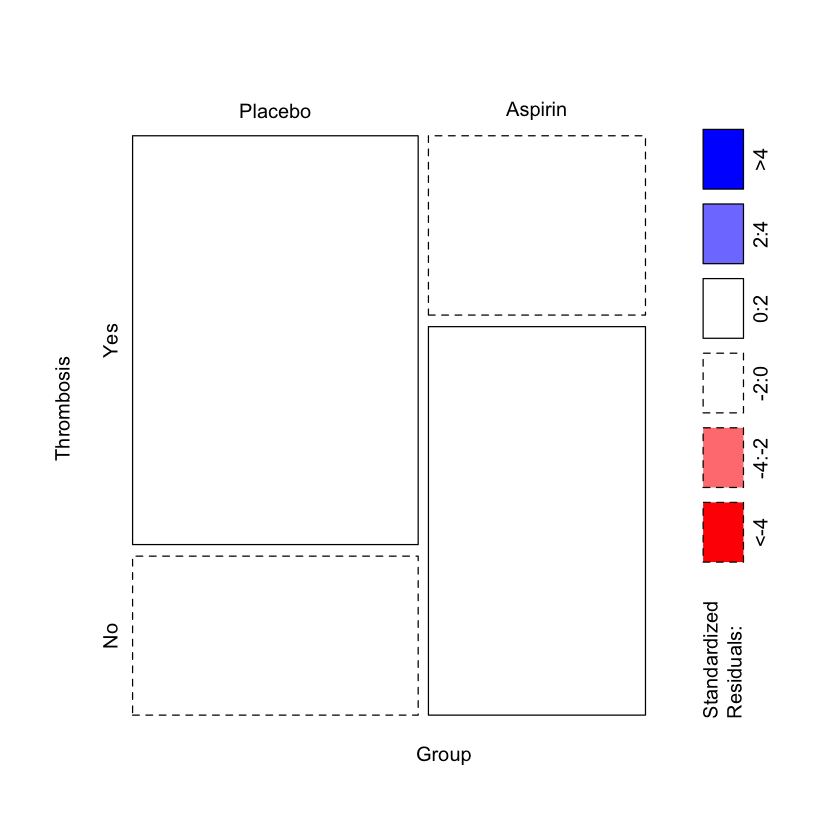

In [3]:
#воссоздадим таблицу
patients <- rbind(c(18, 7), c(6, 13))
#подпишем строки и столбцы
colnames(patients) <- c("Yes", "No")
rownames(patients) <- c("Placebo", "Aspirin")
#вот график, который нам нужен
mosaicplot(patients, color=T, shade=T, ylab="Thrombosis", xlab="Group", cex.axis=1, main="")

Итого:
- размер прямоугольников  соответствует количеству наблюдений.
- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

## 1.9 Practical task

In [35]:
smart_test <-  function(x){
    data <- table(x)
    if (sum(data<5)) {
        # presice fisher
        res <- fisher.test(data)
        res <- c(res$p.value)
    } else {
        # chi squared
        res <- chisq.test(data)
        res <- c(res$statistic[[1]], res$parameter[[1]], res$p.value[[1]])
    }
    return(res)
}

In [36]:
data <- mtcars[1:20,c("am", "vs")]
smart_test(data)

[1] 0.628483

In [37]:
data <- mtcars[1:40,c("am", "vs")]
smart_test(data)

[1] 0.3475355 1.0000000 0.5555115

# Logistic regression

In [44]:
library(dplyr)
library(ggplot2)
library(vcd)

Loading required package: grid


In [45]:
# Считаем данные
titanic <- read.csv("https://stepic.org/media/attachments/course/524/train.csv")
titanic <- na.omit(titanic)
glimpse(titanic)
titanic <- mutate(titanic, 
                  Survived = factor(Survived, labels = c("No", "Yes")), 
                  Pclass = factor(Pclass, labels = c("First", "Second", "Third")), 
                  Sex = factor(Sex, labels = c("Female", "Male")))

Observations: 714
Variables: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1...
$ Pclass      <int> 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2...
$ Name        <fct> Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Fl...
$ Sex         <fct> male, female, female, female, male, male, male, female,...
$ Age         <dbl> 22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 5...
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0...
$ Ticket      <fct> A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, ...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 51.8625, 21.0...
$ Cabin       <fct> , C85, , C123, , E46, , , , G6, C103, , , , , , , , D56...
$ Embarked    <fct> S, C, S, S, S, S, S, S, C, S, S, S, S, S, S, Q, S, S, S...


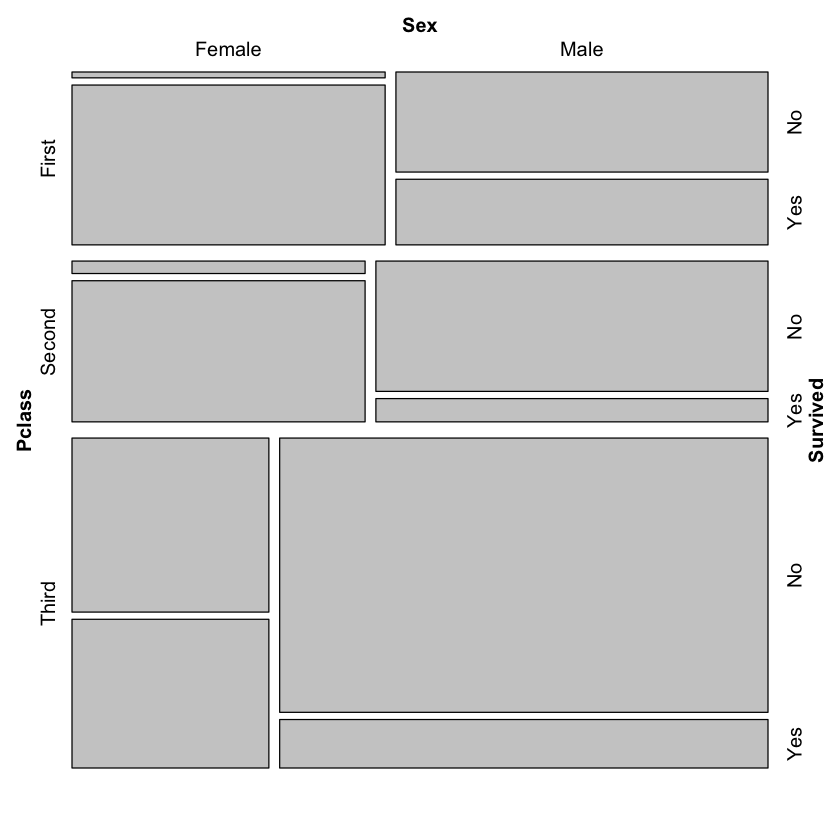

In [46]:
# Построим мозаичный график
mosaic(~ Sex + Survived | Pclass, data=titanic) 

In [47]:
# Модель без предикторов (Intercept only model)
simple_fit <- glm(Survived ~ 1, titanic, family = "binomial")
coef(simple_fit)
table(titanic$Survived)
odds <- 290 / 424
log(odds) 
summary(simple_fit)

(Intercept) 
 -0.3798525


 No Yes 
424 290 

[1] -0.3798525


Call:
glm(formula = Survived ~ 1, family = "binomial", data = titanic)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.021  -1.021  -1.021   1.342   1.342  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3799     0.0762  -4.985  6.2e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 964.52  on 713  degrees of freedom
AIC: 966.52

Number of Fisher Scoring iterations: 4


In [48]:
# Модель с одним номинативным предиктором
fit1 <- glm(Survived ~ Sex, titanic, family = "binomial")
coef(fit1)
table(titanic$Survived, titanic$Sex)

(Intercept)     SexMale 
   1.124321   -2.477825

     
      Female Male
  No      64  360
  Yes    197   93

In [49]:
odds_male <- 93 / 360
odds_female <- 197 / 64

log(odds_female)
log(odds_male)

odds_ratio <- odds_male / odds_female
log(odds_ratio)

[1] 1.124321

[1] -1.353505

[1] -2.477825

In [50]:
# Модель с двумя категориальными предикторами
fit2 <- glm(Survived ~ Sex * Pclass, titanic, family = "binomial")
coef(fit2)
summary(fit2)

(Intercept)              SexMale         PclassSecond 
           3.3081063           -3.7301007           -0.8803580 
         PclassThird SexMale:PclassSecond  SexMale:PclassThird 
          -3.4652918           -0.4204142            2.1542344


Call:
glm(formula = Survived ~ Sex * Pclass, family = "binomial", data = titanic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5861  -0.5732  -0.5705   0.4112   1.9472  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)            3.3081     0.5875   5.631 1.79e-08 ***
SexMale               -3.7301     0.6217  -6.000 1.98e-09 ***
PclassSecond          -0.8804     0.7256  -1.213  0.22503    
PclassThird           -3.4653     0.6202  -5.588 2.30e-08 ***
SexMale:PclassSecond  -0.4204     0.8040  -0.523  0.60106    
SexMale:PclassThird    2.1542     0.6760   3.187  0.00144 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 642.28  on 708  degrees of freedom
AIC: 654.28

Number of Fisher Scoring iterations: 5


In [51]:
table(titanic$Survived, titanic$Pclass , titanic$Sex)

, ,  = Female

     
      First Second Third
  No      3      6    55
  Yes    82     68    47

, ,  = Male

     
      First Second Third
  No     61     84   215
  Yes    40     15    38


In [52]:
# (Intercept) 
female_p1_odds <- 82 / 3
log(female_p1_odds)

# Sexmale  
male_p1_odds <- 40  /  61 
log(male_p1_odds)
log(male_p1_odds / female_p1_odds )

# PclassSecond
female_p2_odds <- 68  /  6 
log(female_p2_odds / female_p1_odds )

# PclassThird
female_p3_odds <- 47  /  55 
log(female_p3_odds / female_p1_odds )

# SexMale:PclassSecond
male_p2_odds <- 15 / 84
log(male_p2_odds / female_p2_odds ) - log(male_p1_odds / female_p1_odds )

#Sexmale:factorThird 
male_p3_odds <- 38 / 215
log(male_p3_odds / female_p3_odds ) - log(male_p1_odds / female_p1_odds )

[1] 3.308107

[1] -0.4219944

[1] -3.730101

[1] -0.8803587

[1] -3.465293

[1] -0.4204135

[1] 2.154235

In [53]:
# сравнение моделей
fit1 <- glm(Survived ~ Sex, titanic, family = "binomial")
fit2 <- glm(Survived ~ Sex * Pclass, titanic, family = "binomial")

anova(fit1, fit2, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
712,750.7002,NA,NA,NA
708,642.2750,4,108.4252,1.576933e-22


In [54]:
# предсказание новых данных
new_data <- data.frame(Sex = "Female", Pclass = "First")
predict(fit2, newdata = new_data, type = "response")


1 
0.9647059

In [55]:
fit3 <- glm(Survived ~ Sex + Pclass, titanic, family = "binomial")
predict(fit3, newdata = new_data)


1 
2.333819

In [58]:
exp(-0.8472979)/(0.428571411594516+1) * 50

[1] 15

In [64]:
exp(0.645)

[1] 1.905987